In [30]:
import os
#using os like reading or writing to a filesystem & managing paths 

import pandas as pd
#data manipulation & analysis 
from utils import initLogger
# initLogger is custom function defined in a utility module ('utils') that initializes logging for the application, is crucial for debugging and monitoring the application's behavior

from drugex.data.processing import Standardization
# process in the drugex library to molecular data, normalizing formats, removing duplicates, or preparing data for further analysis.

from drugex.data.fragments import FragmentCorpusEncoder
#component of the drugex library to encode molecular fragments into a format that can be used by ML models

from drugex.data.fragments import GraphFragmentEncoder, FragmentPairsSplitter
# GraphFragmentEncoder:handles the conversion of molecular fragment data into graph-based representations.
# FragmentPairsSplitter:used to split molecular fragment pairs into training, validation, and test sets.
from drugex.molecules.converters.fragmenters import Fragmenter
# Fragmenter:drugex library, responsible for breaking down molecules into smaller, fragments to simplify complex molecules for analysis

from drugex.data.corpus.vocabulary import VocGraph
# VocGraph:used for graph-based representations of molecules to handling and processing graph data structures 

from drugex.data.datasets import GraphFragDataSet
# GraphFragDataSet : handle and store graph-based representations of molecular fragments, facilitating operations such as loading, manipulation, and iteration during model training

from drugex.training.monitors import FileMonitor
# FileMonitor :drugex library, It helps in tracking the training progress and outcomes, making it easier to analyze and optimize model performance

In [31]:
import random
import torch

# Set the seed for Python's built-in random module
random.seed(42)

# Set the seed for NumPy
np.random.seed(42)

# Set the seed for PyTorch (assuming you're using it for training)
torch.manual_seed(42)
torch.cuda.manual_seed(42)  # if you're using CUDA
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False  # set this to False for reproducibility

# Optionally, set the seed for TensorFlow if you're using it
# import tensorflow as tf
# tf.random.set_seed(42)

# Now, any randomness within these libraries should be reproducible

In [32]:
os.listdir('data')

['.ipynb_checkpoints',
 'data',
 'datasets',
 'download.json',
 'download.log',
 'encoded',
 'logs',
 'models',
 'smiles_dataset.csv',
 'SMILES_drugbank.txt',
 'SMILES_drugbank_with_header.txt']

In [33]:
DATASETS_PATH = 'data/data'

os.listdir(DATASETS_PATH)

['.Papyrus',
 'A2AR_LIGANDS.tsv',
 'data',
 'download.json',
 'download.log',
 'encoded',
 'models',
 'Papyrus05.5_smiles_voc.txt',
 'xanthine.tsv']

In [34]:
df = pd.read_csv(f'{DATASETS_PATH}/A2AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df

Activity_ID Quality    source                       CID  \
0     AACWUFIIMOHGSO_on_P29274_WT    High  ChEMBL31   ChEMBL31.compound.91968   
1     AAEYTMMNWWKSKZ_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.131451   
2     AAGFKZWKWAMJNP_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.100375   
3     AANUKDYJZPKTKN_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.123484   
4     AASXHCGIIQCKEE_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.419145   
...                           ...     ...       ...                       ...   
4077  ZYXGKENMDDPQIE_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.399078   
4078  ZYZWFDVXMLCIOU_on_P29274_WT    High  ChEMBL31   ChEMBL31.compound.94689   
4079  ZZBZWSYDXUPJCT_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.131461   
4080  ZZMIPZLRKFEGIA_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.202018   
4081  ZZXIVHBZTITUIW_on_P29274_WT    High  ChEMBL31  ChEMBL31.compound.248509   

                                                 SMILES    connectivity  \
0     Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...  AACWUFIIMOHGSO   
1     Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...  AAEYTMMNWWKSKZ   
2      O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1  AAGFKZWKWAMJNP   
3     CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...  AANUKDYJZPKTKN   
4     CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...  AASXHCGIIQCKEE   
...                                                 ...             ...   
4077     CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12  ZYXGKENMDDPQIE   
4078         Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1  ZYZWFDVXMLCIOU   
4079              Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1  ZZBZWSYDXUPJCT   
4080      CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1  ZZMIPZLRKFEGIA   
4081           CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12  ZZXIVHBZTITUIW   

                         InChIKey  \
0     AACWUFIIMOHGSO-UHFFFAOYSA-N   
1     AAEYTMMNWWKSKZ-UHFFFAOYSA-N   
2     AAGFKZWKWAMJNP-UHFFFAOYSA-N   
3     AANUKDYJZPKTKN-UHFFFAOYSA-N   
4     AASXHCGIIQCKEE-UHFFFAOYSA-N   
...                           ...   
4077  ZYXGKENMDDPQIE-UHFFFAOYSA-N   
4078  ZYZWFDVXMLCIOU-UHFFFAOYSA-N   
4079  ZZBZWSYDXUPJCT-UHFFFAOYSA-N   
4080  ZZMIPZLRKFEGIA-UHFFFAOYSA-N   
4081  ZZXIVHBZTITUIW-UHFFFAOYSA-N   

                                                  InChI  \
0     InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...   
1     InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...   
2     InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...   
3     InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...   
4     InChI=1S/C24H27N5O6S/c1-4-12-29-23(31)20-21(26...   
...                                                 ...   
4077  InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...   
4078  InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...   
4079  InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...   
4080  InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...   
4081  InChI=1S/C16H19N5O3/c1-4-23-15(22)11-9-18-16(1...   

                                          InChI_AuxInfo  target_id  ...  \
0     "AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...  P29274_WT  ...   
1     "AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...  P29274_WT  ...   
2     "AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...  P29274_WT  ...   
3     "AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...  P29274_WT  ...   
4     "AuxInfo=1/1/N:1,14,30,2,20,26,34,27,33,15,21,...  P29274_WT  ...   
...                                                 ...        ...  ...   
4077  "AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...  P29274_WT  ...   
4078  "AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...  P29274_WT  ...   
4079  "AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...  P29274_WT  ...   
4080  "AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...  P29274_WT  ...   
4081  "AuxInfo=1/1/N:1,13,14,2,20,19,21,11,7,12,6,18...  P29274_WT  ...   

     type_other Activity_class relation pchembl_value pchembl_value_Mean  \
0           NaN  

In [35]:
N_MOLS = 1000

smiles = df.SMILES.sample(N_MOLS)

In [36]:
N_PROC = 4 # standardization can use multiple CPUs
standardizer = Standardization(n_proc=N_PROC)
smiles = standardizer.apply(smiles)

len(smiles)

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

1000

In [37]:
smiles = set(smiles)
len(smiles)

1000

In [38]:
#Fragmentation & Encoding
encoder = FragmentCorpusEncoder(
    fragmenter=Fragmenter(4, 4, 'brics'), # handles how fragment-molecule pairs are created
    encoder=GraphFragmentEncoder(
        VocGraph(n_frags=4) # encoder uses the graph vocabulary to create the graph matrix from the created fragment-molecule pairs
    ),
    pairs_splitter=FragmentPairsSplitter(0.1, 100), # in this instance, we also use a splitter to divide the fragment-molecule pairs into a test set and training set
    n_proc=N_PROC # we can again run these actions in parallel
)

In [39]:
# create a dedicated directory for our graph data set files
DATASETS_ENCODED_PATH = f"{DATASETS_PATH}/encoded/graph"
if not os.path.exists(DATASETS_ENCODED_PATH):
    os.makedirs(DATASETS_ENCODED_PATH)

# create empty data sets (we have to specify a path to a file where the data set will be saved)
train = GraphFragDataSet(f"{DATASETS_ENCODED_PATH}/A2AR_train.tsv", rewrite=True)
test = GraphFragDataSet(f"{DATASETS_ENCODED_PATH}/A2AR_test.tsv", rewrite=True)

In [40]:
# apply the encoder and collect data (test data is collected first)
encoder.apply(list(smiles), encodingCollectors=[test, train])

Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

To speed up the training, the test set size was automatically capped at 100 fragments instead of the default 10% of original data, which would have been: 256.


Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/2 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# load only the smaller test set data
test_from_file = GraphFragDataSet(f'{DATASETS_ENCODED_PATH}/A2AR_test.tsv')

# we can check the output by converting the encoded data set to a pandas DataFrame
pd.DataFrame(test_from_file.getData())

0    1    2    3    4    5    6    7    8    9    ...  390  391  392  \
0      1    0    0    0    1    5    0    0    0    1  ...    0    0    0   
1      1    0    0    0    1   11    0    0    0    1  ...    0    0    0   
2      1    0    0    0    1    2    0    0    0    1  ...    0    0    0   
3      1    0    0    0    1    2    0    0    0    1  ...    0    0    0   
4      1    0    0    0    1    5    0    0    0    1  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
617    1    0    0    0    1    5    0    0    0    1  ...    0    0    0   
618    1    0    0    0    1    2    0    0    0    1  ...    0    0    0   
619    1    0    0    0    1    5    0    0    0    1  ...    0    0    0   
620    1    0    0    0    1    2    0    0    0    1  ...    0    0    0   
621    1    0    0    0    1    5    0    0    0    1  ...    0    0    0   

     393  394  395  396  397  398  399  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
617    0    0    0    0    0    0    0  
618    0    0    0    0    0    0    0  
619    0    0    0    0    0    0    0  
620    0    0    0    0    0    0    0  
621    0    0    0    0    0    0    0  

[622 rows x 400 columns]

In [42]:
train.getVocPath()

'data/data/encoded/graph/A2AR_train.tsv.vocab'

In [43]:
test.getVocPath()

'data/data/encoded/graph/A2AR_test.tsv.vocab'

In [44]:
#Finetuning
MODELS_PR_PATH = 'data/models/pretrained/graph-trans/Papyrus05.5_graph_trans_PT'

os.listdir(MODELS_PR_PATH)

['dataset_preparation',
 'model_pretraining',
 'Papyrus05.5_graph_trans_PT.pkg',
 'Papyrus05.5_graph_trans_PT.vocab',
 'README.txt']

In [45]:
MODEL_FILE_PR = f'{MODELS_PR_PATH}/Papyrus05.5_graph_trans_PT.pkg'
VOCAB_FILE_PR = f'{MODELS_PR_PATH}/Papyrus05.5_graph_trans_PT.vocab'

In [46]:
#load the vocabulary and the model 
vocabulary = VocGraph.fromFile(VOCAB_FILE_PR)
vocabulary

In [47]:
GPUS = [0] 

pretrained = GraphTransformer(voc_trg=vocabulary, use_gpus=GPUS) # attach this model to only the first GPU, but more can be specified
pretrained.loadStatesFromFile(MODEL_FILE_PR)

In [48]:
#Testing the Pretrained Generator
generated = pretrained.generate(
    input_dataset=test_from_file,
    num_samples=10000, # moleclues to generate
    batch_size=64 # batch size for sampling (choose the highest possible value for your GPU/GPUs)
)
generated

Generating molecules:   0%|          | 0/10000 [00:00<?, ?it/s]

SMILES  \
0     COc1ccc(NC(=O)C2C=CN(Cc3ccc(Cl)c(Cl)c3)C(=O)N(...   
1     CCOC(=O)c1scc2c1nc(SC(C(=O)Nc1cccc(F)c1)c1cccc...   
2        COc1ccc(Nc2nc(N3CCNCC3)nc3nc(-c4ccco4)nn23)cc1   
3     O=C(COC(=O)c1ccc(Cl)cc1)Nc1ccc(C(c2cccnc2)N2CC...   
4                      O=C(CNC(=O)c1ccco1)Nc1cccc(Cl)c1   
...                                                 ...   
9995  Nc1nc(-c2ccc(NC(=O)Nc3ccccc3)cc2)nc2sc(-c3ccco...   
9996       Cc1ccccc1CCNC(=O)N(Cc1ccc(F)c(Cl)c1)Cc1ccco1   
9997                Cc1cc(C(=O)NCc2ccccc2C)c(CCCO)cc1Cl   
9998                 Cn1ncnc1-c1ccc2c(c1)CCC(CC(=O)O)O2   
9999           Cc1ccc(NC(C(=O)Nc2c(C)cccc2C)c2ccco2)nc1   

                                 Frags  Valid  Accurate  
0                           Clc1ccccc1    1.0       1.0  
1                                  C=O    1.0       1.0  
2     C1CNCCN1.Nc1ncnc2ncnn12.c1ccccc1    1.0       1.0  
3                           Clc1ccccc1    1.0       1.0  
4                                 CC=O    1.0       1.0  
...                                ...    ...       ...  
9995           Nc1ncnc2scnc12.c1ccccc1    1.0       1.0  
9996                               C=O    1.0       1.0  
9997                               C=O    1.0       1.0  
9998                              CC=O    1.0       1.0  
9999                 Cc1cccnc1.c1ccoc1    1.0       1.0  

[10000 rows x 4 columns]

In [49]:
smilesToGrid(generated.SMILES, n_rows=5, molsPerRow=5)

MolGridWidget()

In [50]:
# Assuming `generated` is your DataFrame and it contains a 'SMILES' column
generated['SMILES'].to_csv('smiles_Transformer.csv', index=False)

In [51]:
smilesToGrid(generated.Frags, n_rows=5, molsPerRow=5)

MolGridWidget()

In [52]:
input_fragments = [
    "c1ccncc1", # pyridine ring
    "C1CC1", # cyclopropane ring
]

In [53]:
smilesToGrid(input_fragments)

MolGridWidget()

In [54]:
generated = pretrained.generate(input_frags=input_fragments, num_samples=100, batch_size=64)
generated

Initialized empty dataset. The data set file does not exist (yet): C:\Users\Admin\AppData\Local\Temp\tmpavc6j4r5. You can add data by calling this instance with the appropriate parameters.


Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Generating molecules:   0%|          | 0/100 [00:00<?, ?it/s]

SMILES     Frags  Valid  \
0   CNc1cn(OC2CCN3C=CN=C(C4CC4)N=C3C2)cc1C(=O)C1(C...     C1CC1    1.0   
1    CCN(C(=O)CC1CC1)c1nnc(C2(C(=O)Nc3nc(C)cs3)CC2)s1     C1CC1    1.0   
2   CCCCC(COc1ccc(C2c3ccc(OC)cc3CN2C(=O)c2c(F)ncc(...  c1ccncc1    1.0   
3                   CC1(CO)CN(CC2CC2)CC1c1cccc2c1OCO2     C1CC1    1.0   
4              Oc1c2[nH]ncc2c(C=Cc2ccccc2)n1-c1cccnc1  c1ccncc1    1.0   
..                                                ...       ...    ...   
95  O=C(O)C1=C(C(=O)N2CCN(c3ccccc3S(=O)(=O)C3CC3)C...     C1CC1    1.0   
96  CCN(Cc1ccc(NC(=O)C(C)C)cc1)C(=O)c1cccc(-c2ccnc...  c1ccncc1    1.0   
97  COc1ccc(C(F)(F)F)cc1CN(C)CC1=C(C(F)(F)F)C=C(NC...     C1CC1    1.0   
98  CN(CC1OC2CCC(NC(=O)c3cccnc3)CC21)c1nc2ccccc2c(...  c1ccncc1    1.0   
99   O=C1C(=Cc2ccc(Cl)c(Cl)c2)OC(=S)N1CCNc1cc(CO)ccn1  c1ccncc1    1.0   

    Accurate  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
..       ...  
95       1.0  
96       1.0  
97       1.0  
98       1.0  
99       1.0  

[100 rows x 4 columns]

In [55]:
smilesToGrid(generated.SMILES)

MolGridWidget()

In [56]:
smilesToGrid(generated.Frags)

MolGridWidget()

In [57]:
from drugex.training.monitors import FileMonitor
import pandas as pd

N_EPOCHS = 3 # set this to a higher number to see more significant effect
MODELS_FT_PATH = 'data/models/finetuned/graph'

# monitor manages serialization of models after each epoch and saves the training log files
monitor = FileMonitor(
    f'{MODELS_FT_PATH}/A2AR_FT', 
    save_smiles=True,
    reset_directory=True, # reset the output directory by removing all previous files
)

# model fitting itself
pretrained.fit(
    train.asDataLoader(64), # create the training data loader and specify the batch size
    test.asDataLoader(64), # create the validation data loader and specify the batch size
    epochs=3, # only 3 epochs to make things faster
    monitor=monitor # use the monitor we created above to track training
)

print("Finetuning done.")

Removing A2AR_FT.pkg from data/models/finetuned/graph
Removing A2AR_FT_fit.log from data/models/finetuned/graph
Removing A2AR_FT_fit.tsv from data/models/finetuned/graph
Removing A2AR_FT_smiles.tsv from data/models/finetuned/graph


Fitting model:   0%|          | 0/3 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/100 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/10 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/100 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/10 [00:00<?, ?it/s]

Iterating over training batches:   0%|          | 0/100 [00:00<?, ?it/s]

Iterating over validation batches:   0%|          | 0/10 [00:00<?, ?it/s]

Finetuning done.


In [58]:
os.listdir(MODELS_FT_PATH)

['A2AR_FT.pkg', 'A2AR_FT_fit.log', 'A2AR_FT_fit.tsv', 'A2AR_FT_smiles.tsv']

In [59]:
# smiles generated at each epoch from the validation set and the input fragment(s) used to generate each
df_smiles = pd.read_csv(f'{MODELS_FT_PATH}/A2AR_FT_smiles.tsv', sep='\t')
df_smiles.head()

Epoch                                             SMILES  \
0      1  N#Cc1cnc2[nH]c(C(=O)c3ccc(Cl)cc3)cc2c1Oc1cc(Cl...   
1      1          Cc1ccc(C(=O)NCc2ccc(-c3ccc(F)cc3)cc2)cc1C   
2      1  N=C(N)NCCCCCC(=O)NC(Cc1c[nH]cn1)C(=O)NC(CCCc1c...   
3      1  CCCc1cc(C(=O)N2CCCC(C(=O)OC(C)C)C2)c2n1N=C2CCO...   
4      1  CCOC(=O)N(C=Nc1nc(NC(=O)CSC)n2cnc3ccsc3c12)C(=...   

                Frags  Valid  Accurate  
0                 C=O    1.0       1.0  
1                 C=O    1.0       1.0  
2  CCN=C(N)N.c1ccccc1    1.0       1.0  
3                 C=O    1.0       1.0  
4                CC=O    1.0       1.0

In [60]:
# training summary with mean training loss and validation loss
df_info = pd.read_csv(f'{MODELS_FT_PATH}/A2AR_FT_fit.tsv', sep='\t')
df_info

Epoch  loss_train  loss_valid  valid_ratio  accurate_ratio  best_epoch
0      1       0.423       3.542          1.0             1.0           1
1      2       0.472       3.425          1.0             1.0           2
2      3       0.370       3.352          1.0             1.0           3

<Axes: xlabel='Epoch'>

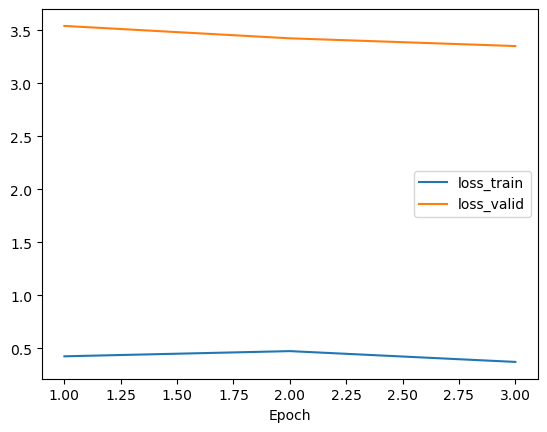

In [61]:
df_info[['loss_train', 'loss_valid', 'Epoch']].plot.line(x='Epoch')

In [62]:
generated = pretrained.generate(input_fragments, num_samples=30)
smilesToGrid(generated.SMILES)

Initialized empty dataset. The data set file does not exist (yet): C:\Users\Admin\AppData\Local\Temp\tmptln1q3pu. You can add data by calling this instance with the appropriate parameters.


Creating fragment-molecule pairs (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Encoding fragment-molecule pairs. (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

Generating molecules:   0%|          | 0/30 [00:00<?, ?it/s]

MolGridWidget()

In [63]:
os.listdir(MODELS_FT_PATH)

['A2AR_FT.pkg', 'A2AR_FT_fit.log', 'A2AR_FT_fit.tsv', 'A2AR_FT_smiles.tsv']

You can use this file to initialize the finetuned model once again to continue training or use it in another session.

The monitor also directly enables us to get the best model's states that we could use for initialization of a new instance as well:

In [64]:
other_model = GraphTransformer(voc_trg=vocabulary)
other_model.load_state_dict(monitor.getModel())

<All keys matched successfully>

For consistency, we will also now save the used vocabulary with the model so that we can always initialize it exactly the way we did during finetuning:

In [65]:
vocabulary.toFile(f'{MODELS_FT_PATH}/A2AR_FT.vocab')